# S3 E19

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore') 

import opendatasets as od 

# Importing Data

Datasets

In [2]:
od.download('https://www.kaggle.com/competitions/playground-series-s3e19/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading playground-series-s3e19.zip to .\playground-series-s3e19


100%|██████████| 1.18M/1.18M [00:00<00:00, 2.55MB/s]


Extracting archive .\playground-series-s3e19/playground-series-s3e19.zip to .\playground-series-s3e19


In [15]:
path = './playground-series-s3e19/' 

train = pd.read_csv(path+'train.csv').drop(columns={'id'})
test = pd.read_csv(path+'test.csv').drop(columns={'id'})
submission = pd.read_csv(path+'sample_submission.csv')

# EDA

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      136950 non-null  object
 1   country   136950 non-null  object
 2   store     136950 non-null  object
 3   product   136950 non-null  object
 4   num_sold  136950 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 5.2+ MB


Changing date datatype to dt

In [27]:
train['date'] = pd.to_datetime(train.date) 
test['date'] = pd.to_datetime(test.date) 

In [5]:
train.head()

,date,country,store,product,num_sold
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


Checking single values per column 

In [6]:
for x in train.columns[1:4]: 
    print(f'{x} values: {train[x].unique()}')

country values: ['Argentina' 'Canada' 'Estonia' 'Japan' 'Spain']
store values: ['Kaggle Learn' 'Kaggle Store' 'Kagglazon']
product values: ['Using LLMs to Improve Your Coding' 'Using LLMs to Train More LLMs'
 'Using LLMs to Win Friends and Influence People'
 'Using LLMs to Win More Kaggle Competitions' 'Using LLMs to Write Better']


Adding some date-related columns

In [7]:
train['year_and_month'] = train.date.dt.strftime('%Y-%m')  
train.head()

,date,country,store,product,num_sold,year_and_month
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017-01
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017-01
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017-01
3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017-01
4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017-01


Lineplot per Country

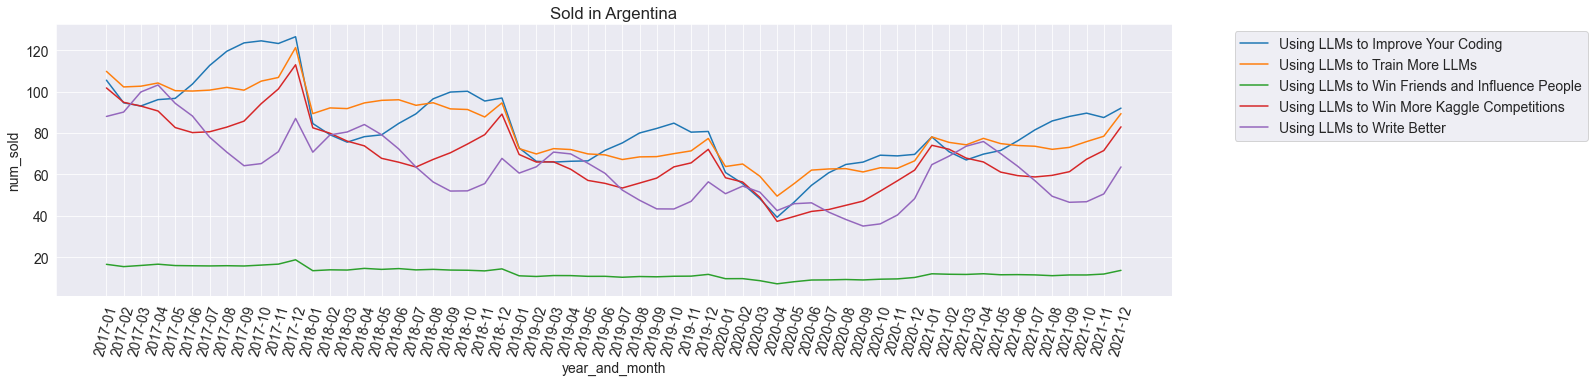

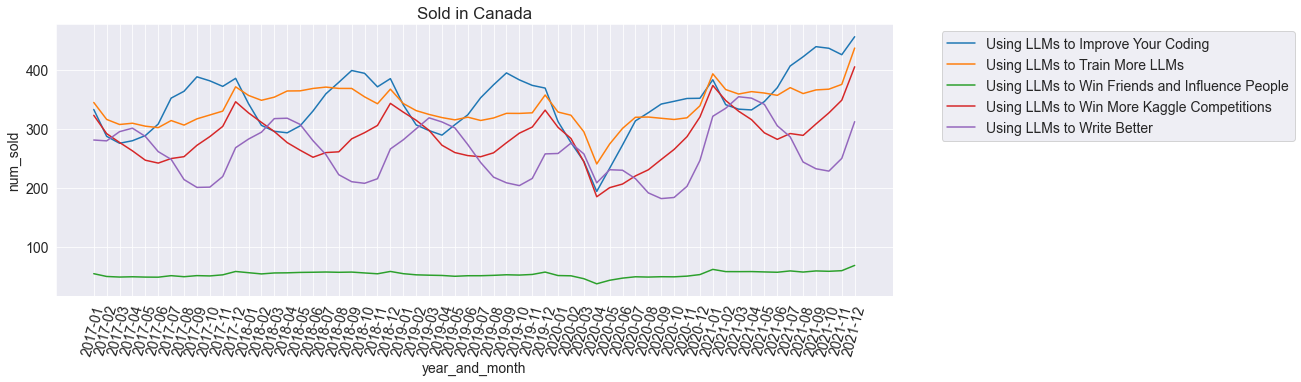

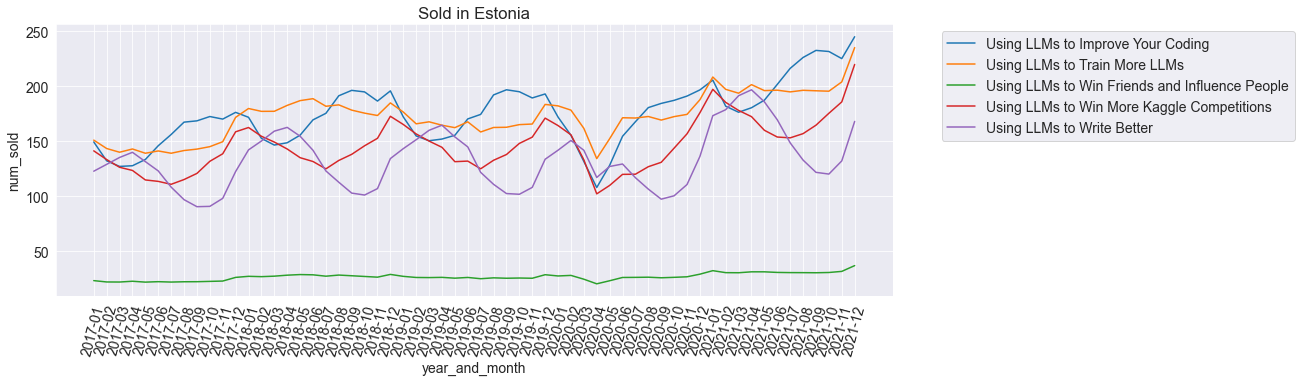

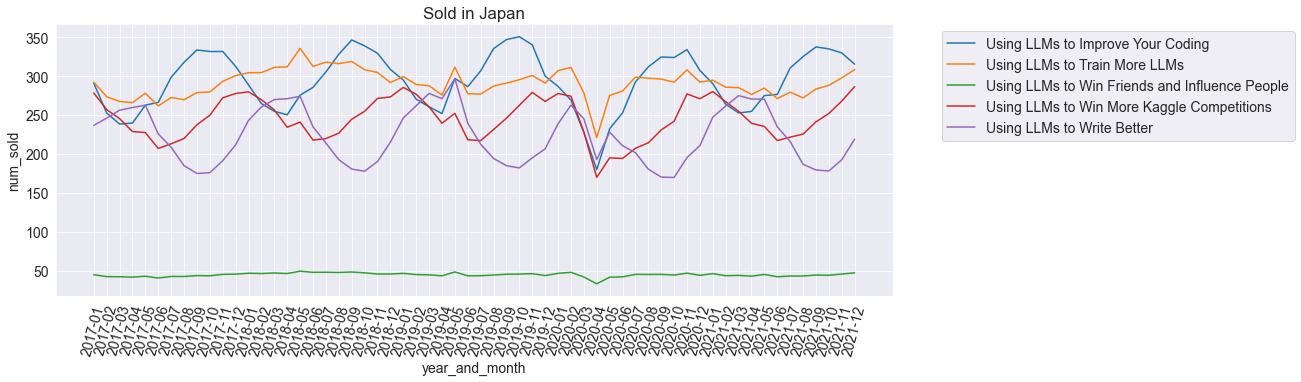

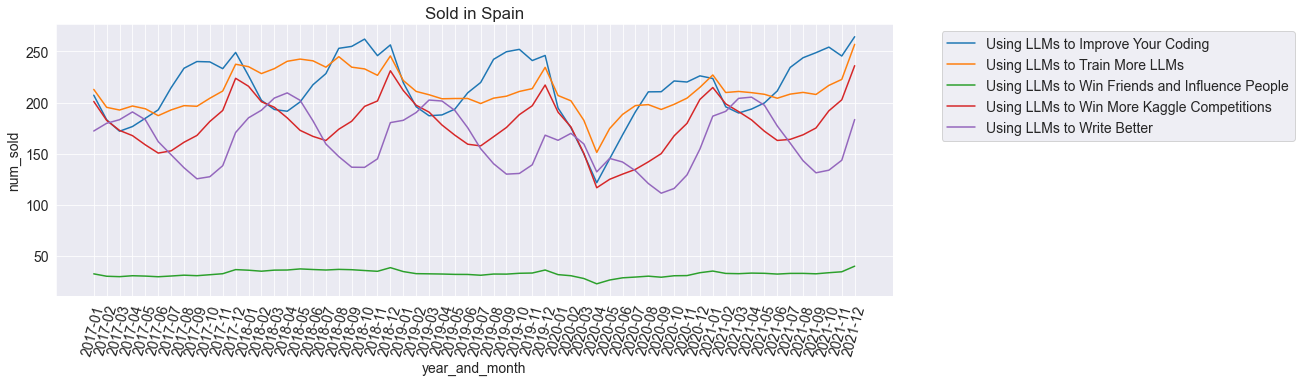

In [9]:
plt.figure(figsize=(20,5)) 

for c in train.country.unique(): 
    sns.lineplot(data=train[train.country==c], x='year_and_month', y='num_sold', hue='product', ci=None) 
    plt.title(f'Sold in {c}') 
    plt.xticks(rotation=75)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

Store with the highest sellings

In [11]:
train.groupby(['country','store'], as_index=False).num_sold.sum()

,country,store,num_sold
0,Argentina,Kagglazon,1165626
1,Argentina,Kaggle Learn,203018
2,Argentina,Kaggle Store,314600
3,Canada,Kagglazon,4842322
4,Canada,Kaggle Learn,854127
5,Canada,Kaggle Store,1316665
6,Estonia,Kagglazon,2472309
7,Estonia,Kaggle Learn,434389
8,Estonia,Kaggle Store,670621
9,Japan,Kagglazon,4154670


Kagglazon is the most popular one. 

# Feature Engineering  

Adding columns like: 
- day of week  
- day of year    
- year  
- month  
- holiday    

## Adding New Time Columns

In [28]:
train['day_of_year'] = train.date.dt.day_of_year  
test['day_of_year'] = test.date.dt.day_of_year  

In [29]:
train['day_of_week'] = train.date.dt.day_of_week 
test['day_of_week'] = test.date.dt.day_of_week 

In [30]:
train['year'] = train.date.dt.year  
test['year'] = test.date.dt.year 

In [31]:
train['month'] = train.date.dt.month 
test['month'] = test.date.dt.month 

## Adding Holiday Column

In [32]:
import holidays

In [9]:
hdays_ar = holidays.CountryHoliday('AR', years=np.arange(2017,2022))
hdays_ar = pd.DataFrame([hdays_ar]).T.rename(columns={0:'hol_names'})
hdays_ar['country'] = 'Argentina' 
hdays_ar

,hol_names,country
2017-01-01,Año Nuevo,Argentina
2017-02-27,Día de Carnaval,Argentina
2017-02-28,Día de Carnaval,Argentina
2017-03-24,Día Nacional de la Memoria por la Verdad y la ...,Argentina
2017-04-02,Día del Veterano y de los Caidos en la Guerra ...,Argentina
...,...,...
2021-12-25,Navidad,Argentina
2021-06-21,Paso a la Inmortalidad del General Don Martín ...,Argentina
2021-08-16,Paso a la Inmortalidad del General Don José de...,Argentina
2021-10-11,Día del Respeto a la Diversidad Cultural (Obse...,Argentina


Writing a function

In [33]:
codes = ['AR', 'CA', 'EE', 'JP', 'ES'] 
countries = train.country.unique()

def holidays_creator(country, country_code, year_min, year_max):
    hol_df = holidays.CountryHoliday(country_code, years=np.arange(year_min, year_max+1)) 
    hol_df = pd.DataFrame([hol_df]).T.rename(columns={0:'hol_names'})
    hol_df['country'] = country  
    hol_df['date'] = pd.to_datetime(hol_df.index)
    return hol_df
    

In [34]:
all_holidays = pd.DataFrame() 

for cou, cod in zip(countries, codes):
    new_df = holidays_creator(cou, cod, 2017, 2021) 
    all_holidays = pd.concat([all_holidays, new_df])

In [35]:
all_holidays = all_holidays.reset_index().rename(columns={'index':'removable_dates'}).drop(columns='removable_dates') 
all_holidays

,hol_names,country,date
0,Año Nuevo,Argentina,2017-01-01
1,Día de Carnaval,Argentina,2017-02-27
2,Día de Carnaval,Argentina,2017-02-28
3,Día Nacional de la Memoria por la Verdad y la ...,Argentina,2017-03-24
4,Día del Veterano y de los Caidos en la Guerra ...,Argentina,2017-04-02
...,...,...,...
351,Día de la Hispanidad,Spain,2021-10-12
352,Todos los Santos,Spain,2021-11-01
353,Día de la Constitución Española,Spain,2021-12-06
354,La Inmaculada Concepción,Spain,2021-12-08


In [72]:
all_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   hol_names  356 non-null    object        
 1   country    356 non-null    object        
 2   date       356 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 8.5+ KB


In [36]:
all_holidays_test = pd.DataFrame() 

for cou, cod in zip(countries, codes):
    new_df = holidays_creator(cou, cod, 2022, 2022) 
    all_holidays_test = pd.concat([all_holidays_test, new_df])

In [45]:
all_holidays_test = all_holidays_test.reset_index().rename(
    columns={'index':'removable_dates'}).drop(columns='removable_dates') 
all_holidays_test

,hol_names,country,date
0,Censo nacional 2022,Argentina,2022-05-18
1,Feriado con fines turísticos,Argentina,2022-10-07
2,Feriado con fines turísticos,Argentina,2022-11-21
3,Feriado con fines turísticos,Argentina,2022-12-09
4,Año Nuevo,Argentina,2022-01-01
...,...,...,...
64,Asunción de la Virgen,Spain,2022-08-15
65,Día de la Hispanidad,Spain,2022-10-12
66,Todos los Santos,Spain,2022-11-01
67,Día de la Constitución Española,Spain,2022-12-06


Merging with the original dataframes

In [15]:
final_train = train.merge(
    all_holidays, how='left', left_on=['date', 'country'], right_on=['date', 'country']).fillna('No_Holiday')
final_train

,date,country,store,product,num_sold,day_of_year,day_of_week,year,month,hol_names
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,6,2017,1,Año Nuevo
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,1,6,2017,1,Año Nuevo
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,6,2017,1,Año Nuevo
3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,6,2017,1,Año Nuevo
4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,1,6,2017,1,Año Nuevo
...,...,...,...,...,...,...,...,...,...,...
136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,365,4,2021,12,No_Holiday
136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,365,4,2021,12,No_Holiday
136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,365,4,2021,12,No_Holiday
136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,365,4,2021,12,No_Holiday


In [16]:
final_test = test.merge(
    all_holidays_test, how='left', left_on=['date', 'country'], right_on=['date', 'country']).fillna('No_Holiday') 
final_test

,date,country,store,product,day_of_year,day_of_week,year,month,hol_names
0,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,1,5,2022,1,Año Nuevo
1,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,1,5,2022,1,Año Nuevo
2,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,1,5,2022,1,Año Nuevo
3,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,1,5,2022,1,Año Nuevo
4,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,1,5,2022,1,Año Nuevo
...,...,...,...,...,...,...,...,...,...
27370,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,365,5,2022,12,No_Holiday
27371,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,365,5,2022,12,No_Holiday
27372,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,365,5,2022,12,No_Holiday
27373,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,365,5,2022,12,No_Holiday


In [24]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         136950 non-null  datetime64[ns]
 1   country      136950 non-null  object        
 2   store        136950 non-null  object        
 3   product      136950 non-null  object        
 4   num_sold     136950 non-null  int64         
 5   day_of_year  136950 non-null  int32         
 6   day_of_week  136950 non-null  int32         
 7   year         136950 non-null  int32         
 8   month        136950 non-null  int32         
 9   hol_names    136950 non-null  object        
dtypes: datetime64[ns](1), int32(4), int64(1), object(4)
memory usage: 8.4+ MB


Encoding Holidays

Storing

In [17]:
final_train.to_csv('final_train_df_definitive_hol.csv', index=None) 
final_test.to_csv('final_test_df_definitive_hol.csv', index=None)

Importing data again.

In [3]:
final_train = pd.read_csv('final_train_df_definitive_hol.csv')
final_test = pd.read_csv('final_test_df_definitive_hol.csv')

In [4]:
final_train

,date,country,store,product,num_sold,day_of_year,day_of_week,year,month,hol_names
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,6,2017,1,Año Nuevo
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,1,6,2017,1,Año Nuevo
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,6,2017,1,Año Nuevo
3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,6,2017,1,Año Nuevo
4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,1,6,2017,1,Año Nuevo
...,...,...,...,...,...,...,...,...,...,...
136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,365,4,2021,12,No_Holiday
136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,365,4,2021,12,No_Holiday
136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,365,4,2021,12,No_Holiday
136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,365,4,2021,12,No_Holiday


## Encoding the Holiday Column

In [5]:
final_train['hol_names'] = final_train.apply(lambda x: 1 if x.hol_names != 'No_Holiday' else 0, axis=1)
final_test['hol_names'] = final_test.apply(lambda x: 1 if x.hol_names != 'No_Holiday' else 0, axis=1)

In [6]:
final_train

,date,country,store,product,num_sold,day_of_year,day_of_week,year,month,hol_names
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,6,2017,1,1
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,1,6,2017,1,1
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,6,2017,1,1
3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,6,2017,1,1
4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,1,6,2017,1,1
...,...,...,...,...,...,...,...,...,...,...
136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,365,4,2021,12,0
136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,365,4,2021,12,0
136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,365,4,2021,12,0
136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,365,4,2021,12,0


## Encoding Categorical Columns

In [7]:
from sklearn.preprocessing import OneHotEncoder 

cols_to_encode = final_train[['country', 'store', 'product']].columns 

encoder = OneHotEncoder(sparse=False).fit(final_train[cols_to_encode]) 

encoded_cols = list(encoder.get_feature_names_out(cols_to_encode)) 

final_train[encoded_cols] = encoder.transform(final_train[cols_to_encode])
final_test[encoded_cols] = encoder.transform(final_test[cols_to_encode]) 

final_train.drop(columns=cols_to_encode, inplace=True) 
final_test.drop(columns=cols_to_encode, inplace=True)

In [7]:
final_test

,date,day_of_year,day_of_week,year,month,hol_names,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
0,2022-01-01,1,5,2022,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2022-01-01,1,5,2022,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2022-01-01,1,5,2022,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2022-01-01,1,5,2022,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2022-01-01,1,5,2022,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,2022-12-31,365,5,2022,12,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27371,2022-12-31,365,5,2022,12,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27372,2022-12-31,365,5,2022,12,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27373,2022-12-31,365,5,2022,12,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Splitting

In [8]:
X = final_train.drop(columns='num_sold') 
y = final_train.num_sold 

## Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler  

cols_to_scale = X.select_dtypes(np.number).columns.to_list()

scaler = MinMaxScaler().fit(X[cols_to_scale]) 

X[cols_to_scale] = scaler.transform(X[cols_to_scale])
final_test[cols_to_scale] = scaler.transform(final_test[cols_to_scale])

In [10]:
X

,date,day_of_year,day_of_week,year,month,hol_names,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
0,2017-01-01,0.00000,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2017-01-01,0.00000,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2017-01-01,0.00000,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2017-01-01,0.00000,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2017-01-01,0.00000,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,2021-12-31,0.99726,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
136946,2021-12-31,0.99726,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
136947,2021-12-31,0.99726,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
136948,2021-12-31,0.99726,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
final_test

,date,day_of_year,day_of_week,year,month,hol_names,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
0,2022-01-01,0.00000,0.833333,1.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2022-01-01,0.00000,0.833333,1.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2022-01-01,0.00000,0.833333,1.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2022-01-01,0.00000,0.833333,1.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2022-01-01,0.00000,0.833333,1.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,2022-12-31,0.99726,0.833333,1.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27371,2022-12-31,0.99726,0.833333,1.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27372,2022-12-31,0.99726,0.833333,1.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27373,2022-12-31,0.99726,0.833333,1.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
X.drop(columns='date', inplace=True) 
final_test.drop(columns='date', inplace=True)

# Model Creation

With XGBRegressor

In [11]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from xgboost import XGBRegressor

In [13]:
regr = RandomizedSearchCV(XGBRegressor(n_jobs=-1, random_state=42, objective='reg:squarederror'), {
    'max_depth': [8,9,10,11,12,13,14,15],
    'learning_rate': [.005, .01, .03, .05, .1, .15, .2, .3],
    'n_estimators': [800, 1000, 2000, 2500],
    'min_child_weight': [6,7,8,9,10,11,12,13,14,15],
    'subsample': [.4, .5, .6, .7, .8, .9, 1, 1.5],
    'colsample_bytree': [.5, .6, .7, .8, .9, 1, 1.5, 2],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, .6, .7, .8],
    'reg_lambda':[0, 0.5, 1, 1.5, 2, 3, 4, 4.5]
}, cv=TimeSeriesSplit(n_splits=5), return_train_score=False, scoring='neg_mean_absolute_percentage_error', n_iter=5)

regr.fit(X,y)

pd.DataFrame(regr.cv_results_).sort_values('rank_test_score').head(3)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_lambda,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,...,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,24.225459,12.565363,0.165520,0.022774,0.9,4,800,8,9,0.03,...,0.5,"{'subsample': 0.9, 'reg_lambda': 4, 'n_estimat...",-0.125312,-0.090421,-0.119642,-0.099219,-0.087543,-0.104427,0.015337,1
3,62.443714,28.091860,0.327956,0.005787,0.4,1.5,1000,10,13,0.05,...,0.9,"{'subsample': 0.4, 'reg_lambda': 1.5, 'n_estim...",-0.126370,-0.092887,-0.122940,-0.112531,-0.088703,-0.108686,0.015360,2
4,37.977978,18.366626,0.209880,0.006633,0.9,1,1000,10,9,0.03,...,0.9,"{'subsample': 0.9, 'reg_lambda': 1, 'n_estimat...",-0.124507,-0.087726,-0.115387,-0.115686,-0.100638,-0.108789,0.013025,3


In [14]:
regr.best_params_

{'subsample': 0.9,
 'reg_lambda': 4,
 'n_estimators': 800,
 'min_child_weight': 8,
 'max_depth': 9,
 'learning_rate': 0.03,
 'gamma': 0.6,
 'colsample_bytree': 0.5}

With CatBoostRegressor

In [12]:
from catboost import CatBoostRegressor

In [32]:
regr_cat = RandomizedSearchCV(CatBoostRegressor(random_state=42, silent=True), {
    'depth': [7,8,9,10],
    'learning_rate': [.05, .09, .1, .12, .14, .15],
    'iterations': [900, 1000, 1100, 1200],
    'min_child_samples': [2, 3, 4],
    'subsample': [1, 1.1, 1.3, 1.5],
    'colsample_bylevel': [.8, .9, .95, 1, 1.3, 1.5, 2],
    'l2_leaf_reg':[1.5, 2, 3, 3.5, 4, 4.3, 4.5]
}, cv=TimeSeriesSplit(n_splits=5), return_train_score=False, scoring='neg_mean_absolute_percentage_error', n_iter=5)

regr_cat.fit(X,y)

pd.DataFrame(regr_cat.cv_results_).sort_values('rank_test_score').head(3)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_samples,param_learning_rate,param_l2_leaf_reg,param_iterations,param_depth,param_colsample_bylevel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,10.580661,3.755315,0.016736,0.004809,1,4,0.09,2,1100,8,0.9,"{'subsample': 1, 'min_child_samples': 4, 'lear...",-0.123978,-0.094345,-0.120326,-0.125625,-0.084677,-0.10979,0.016925,1
0,0.011278,0.000950,0.000000,0.000000,1.1,3,0.15,3,1200,9,1.3,"{'subsample': 1.1, 'min_child_samples': 3, 'le...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,0.009376,0.007040,0.000000,0.000000,1.1,3,0.12,4.3,1100,10,1.5,"{'subsample': 1.1, 'min_child_samples': 3, 'le...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [33]:
regr_cat.best_params_

{'subsample': 1,
 'min_child_samples': 4,
 'learning_rate': 0.09,
 'l2_leaf_reg': 2,
 'iterations': 1100,
 'depth': 8,
 'colsample_bylevel': 0.9}

Best model params

In [34]:
best_cat_params = {
    'subsample': 1,
     'min_child_samples': 2,
     'learning_rate': 0.1,
     'l2_leaf_reg': 4.5,
     'iterations': 1200,
     'depth': 8,
     'colsample_bylevel': 0.9
}

In [35]:
cat_model = CatBoostRegressor(random_state=42, silent=True, **best_cat_params) 

cat_model.fit(X, y)

Best XGBRegressor params

In [44]:
best_xgb_params = {
    'objective':'reg:squarederror',
    'max_depth':11,
    'learning_rate':.01,
    'n_estimators':1000,
    'min_child_weight':10,
    'subsample':.6,
    'colsample_bytree':.9,
    'gamma':.4,
    'reg_lambda':3
}

In [45]:
xgb_model = XGBRegressor(n_jobs=-1, random_state=42, **best_xgb_params) 

xgb_model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

## Country Trick

Adding the 'num_sold' column to the test set. 

In [46]:
test = pd.read_csv('./playground-series-s3e19/test.csv')
test['num_sold'] = (cat_model.predict(final_test)*0.6) + (xgb_model.predict(final_test)*0.4) # here it is possible to make the predictions with the best model
test

,id,date,country,store,product,num_sold
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,37.805150
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,38.935661
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,6.329291
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,36.064885
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,27.584177
...,...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,726.471133
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,729.278937
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,107.311568
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,659.635003


Finding the ratios for each Country. All of them must have the almost the same amount of books sold. 

In [47]:
general_mean = test.num_sold.mean() 
country_means = {}

for x in test.country.unique(): 
    country_means[x] = (test[test.country == x].num_sold.mean())/general_mean
country_means    

{'Argentina': 0.33215037800084135,
 'Canada': 1.621466691745701,
 'Estonia': 0.8710835309064136,
 'Japan': 1.2390442736596905,
 'Spain': 0.9362551256873538}

The last step is multiplying the final predictions for a factor between 1 and 2. As I found in Kaggle notebooks and discussions, 1.53 appears to be the best one.

In [48]:
test

,id,date,country,store,product,num_sold
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,37.805150
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,38.935661
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,6.329291
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,36.064885
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,27.584177
...,...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,726.471133
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,729.278937
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,107.311568
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,659.635003


In [49]:
for index, row in test.iterrows():
    if row.country == 'Argentina':
        test.loc[index, 'num_sold'] = (row.num_sold*1.53)/country_means['Argentina'] 
    elif row.country == 'Canada':
        test.loc[index, 'num_sold'] = (row.num_sold*1.53)/country_means['Canada'] 
    elif row.country == 'Estonia':
        test.loc[index, 'num_sold'] = (row.num_sold*1.53)/country_means['Estonia']  
    elif row.country == 'Japan':
        test.loc[index, 'num_sold'] = (row.num_sold*1.53)/country_means['Japan'] 
    elif row.country == 'Spain':
        test.loc[index, 'num_sold'] = (row.num_sold*1.53)/country_means['Spain']   
        
test

,id,date,country,store,product,num_sold
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,174.143652
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,179.351180
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,29.154912
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,166.127385
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,127.062297
...,...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,1187.177302
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,1191.765731
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,175.365340
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,1077.955706


Rounding to the nearest integer.

In [50]:
test['num_sold'] = np.round(test.num_sold, 0) 

# Submission

In [51]:
submission = pd.read_csv('./playground-series-s3e19/sample_submission.csv')
submission['num_sold'] = test.num_sold 
submission.to_csv('nineteenth_attempt.csv', index=None)

## Conclusions   

This final solution was suggested by: https://www.kaggle.com/code/juanmerinobermejo/ps3e19-linearregression-catboost-trick-12-8 

In this case using this trick helped to obtain a similar number of sold items for each country.  